
# <p style="text-align: center;">EE 461P: Data Science Principles</p>
# <p style="text-align: center;">Assignment 4</p>
## <p style="text-align: center;">Total points: 55</p>
## <p style="text-align: center;">Due: Thursday, November 9th, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1 - Bayesian Classifiers (15 pts)

Download the income dataset from Canvas. This contains features used as indicators for a person's income. The goal is to classify whether the income is >=50k or < 50k. More details can be found on the UCI repository for the adult dataset at https://archive.ics.uci.edu/ml/machine-learning-databases/adult/
The code below loads the dataset and all necessary sklearn modules. 

1. Train Linear Discriminant Analysis, Quadratic Discriminant Analysis, and (Gaussian) Naive Bayes. Extract the probability of the class being >= 50k or < 50k for every row. 
2. Use this to plot the receiver operating characteristic (ROC) curve of each model. 
3. Report the area under the ROC curve (AUC) for each model. (5 pts for each model. Total of 15 pts)

In [1]:
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original", data_home='./dataset/')  # data downloaded in'./dataset/', change if necessary

X= (mnist.data / 255.)
y = mnist.target

X_train = X[:60000]
y_train = y[:60000]

X_test = X[60000:]
y_test = y[60000:]

In [3]:
idx = (y_train == 8) + (y_train==9)
X_train = X_train[idx]
y_train = y_train[idx]
y_train = (y_train-8)

idx = (y_test == 8) + (y_test==9)
X_test = X_test[idx]
y_test = y_test[idx]
y_test = (y_test-8)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

((11800, 784), (11800,), (1983, 784), (1983,))


In [4]:
def run_models(models, names):
    for m_iter in range(len(models)):
        models[m_iter].fit(X_train, y_train)
        estimates_test = models[m_iter].predict_proba(X_test)[:,1]
        fpr, tpr, threshholds = roc_curve(y_test, estimates_test)
        plt.plot(fpr, tpr, label=names[m_iter])
        print {'AUC':roc_auc_score(y_test, estimates_test),'accuracy':np.mean(y_test==(estimates_test > .5))}
    plt.title('roc curve')
    plt.legend()

/home/saharsh/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


{'AUC': 0.99360580239853646, 'accuracy': 0.97075138678769546}


/home/saharsh/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


{'AUC': 0.94016327386173315, 'accuracy': 0.93696419566313671}
{'AUC': 0.90165817702281104, 'accuracy': 0.87544125063035805}


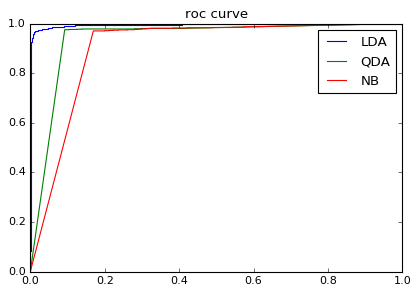

In [5]:
run_models([LDA(), QDA(), GaussianNB()], ['LDA', 'QDA', 'NB'])

# Question 2: Bayesian Belief Networks (10 pts)
In the Bayesian Network shown below, the nodes represent the following random variables: S stands for "Smoking", LC for "Lung Cancer", B for "Bronchitis", T for "Tuberculosis", D for "Dyspnea". The necessary conditional probabilities are provided alongside. 

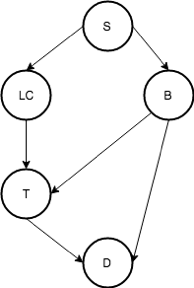

In [6]:
from IPython.display import Image
Image(filename='BayesianNetworks.png')

$$Pr(S = yes) = 0.1$$
$$Pr(LC = yes | S = yes) = 0.03$$
$$Pr(LC = yes | S = no) = 0.01$$
$$Pr(B = yes | S = yes) = 0.06$$
$$Pr(B = yes | S = no) = 0.02$$
$$Pr(T = yes | LC = yes, B = yes) = 0.8$$
$$Pr(T = yes | LC = yes, B = no) = 0.5$$
$$Pr(T = yes | LC = no, B = yes) = 0.1$$
$$Pr(T = yes | LC = no, B = no) = 0.04$$
$$Pr(D = yes | T = yes, B = yes) = 0.9$$
$$Pr(D = yes | T = yes, B = no) = 0.7$$
$$Pr(D = yes | T = no, B = yes) = 0.65$$
$$Pr(D = yes | T = no, B = no) = 0.015$$

Compute the following probabilities:

(a) (2 pts) $Pr(D = yes)$

(b) (2 pts) $Pr(LC = no, B = yes, D = yes)$

(c) (3 pts) Given that a person has Bronchitis (B = yes) and no Lung Cancer (LC = no), the probability he will has symptoms of Dyspnea (D = yes).

(d) (3 pts) Given that a person is a smoker (S = yes), the probability he will get infected with Tuberculosis (T = yes).

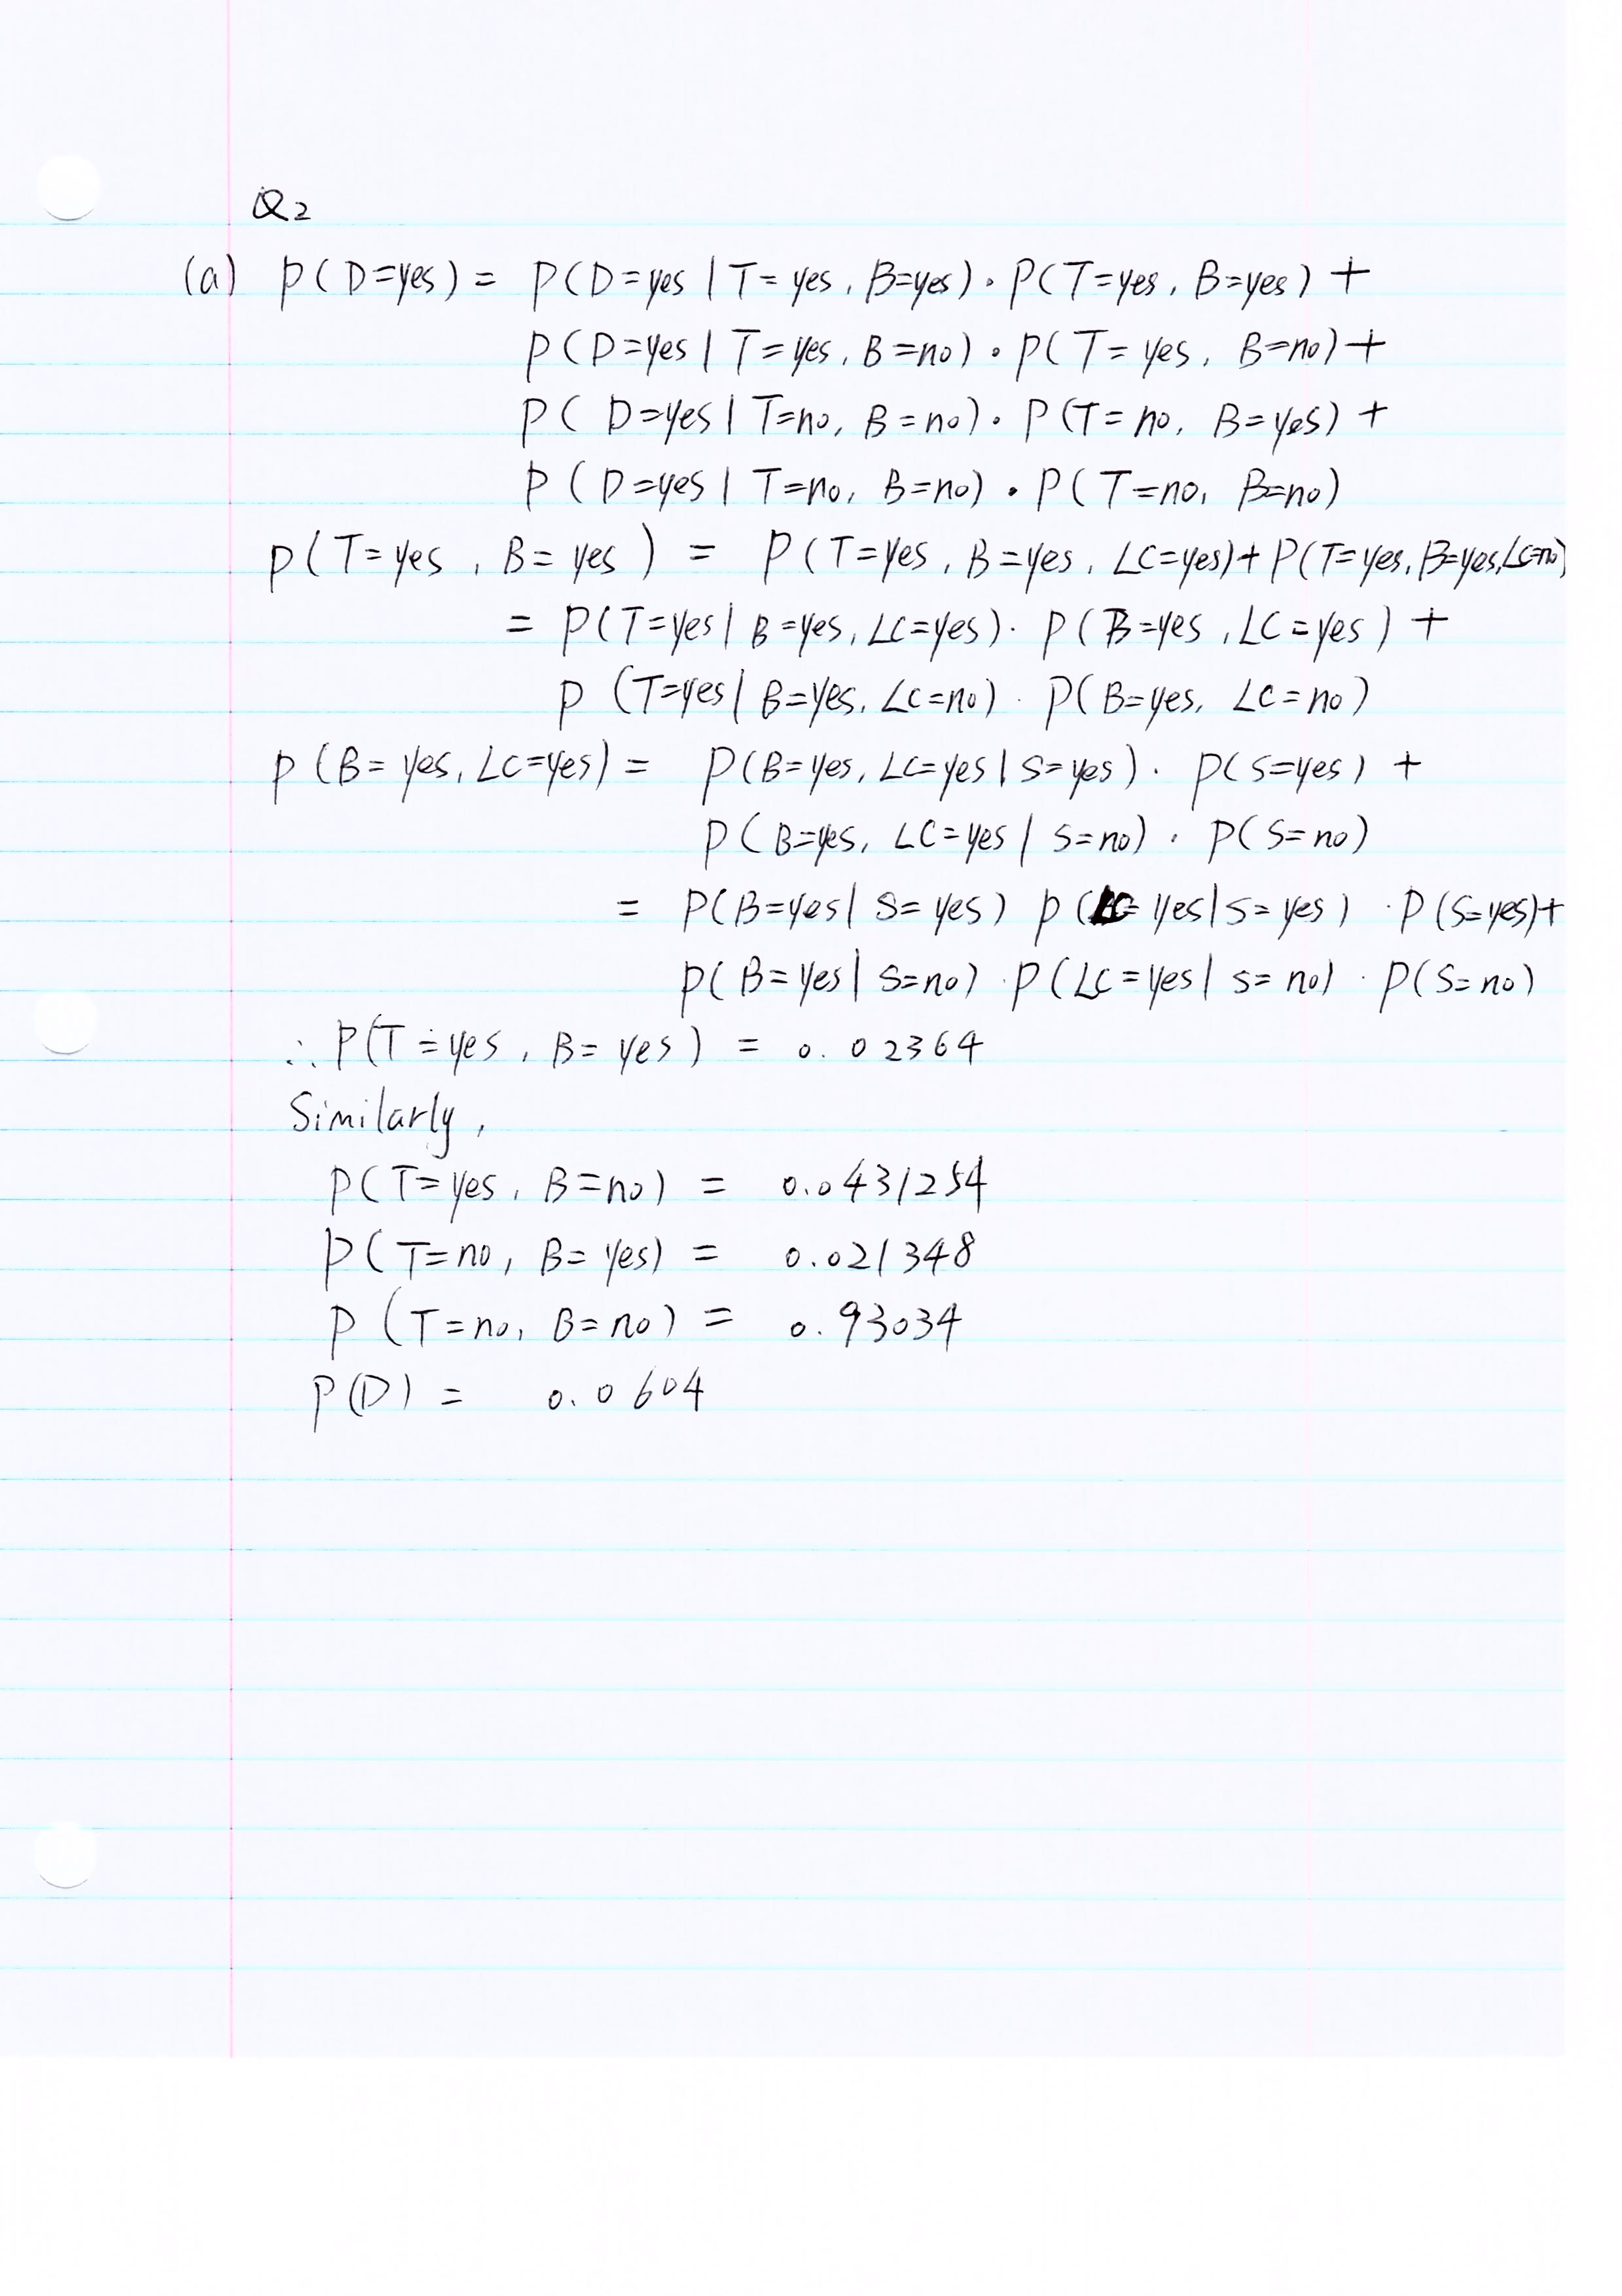

In [8]:
from IPython.display import Image
Image(filename='q2_1.jpg')

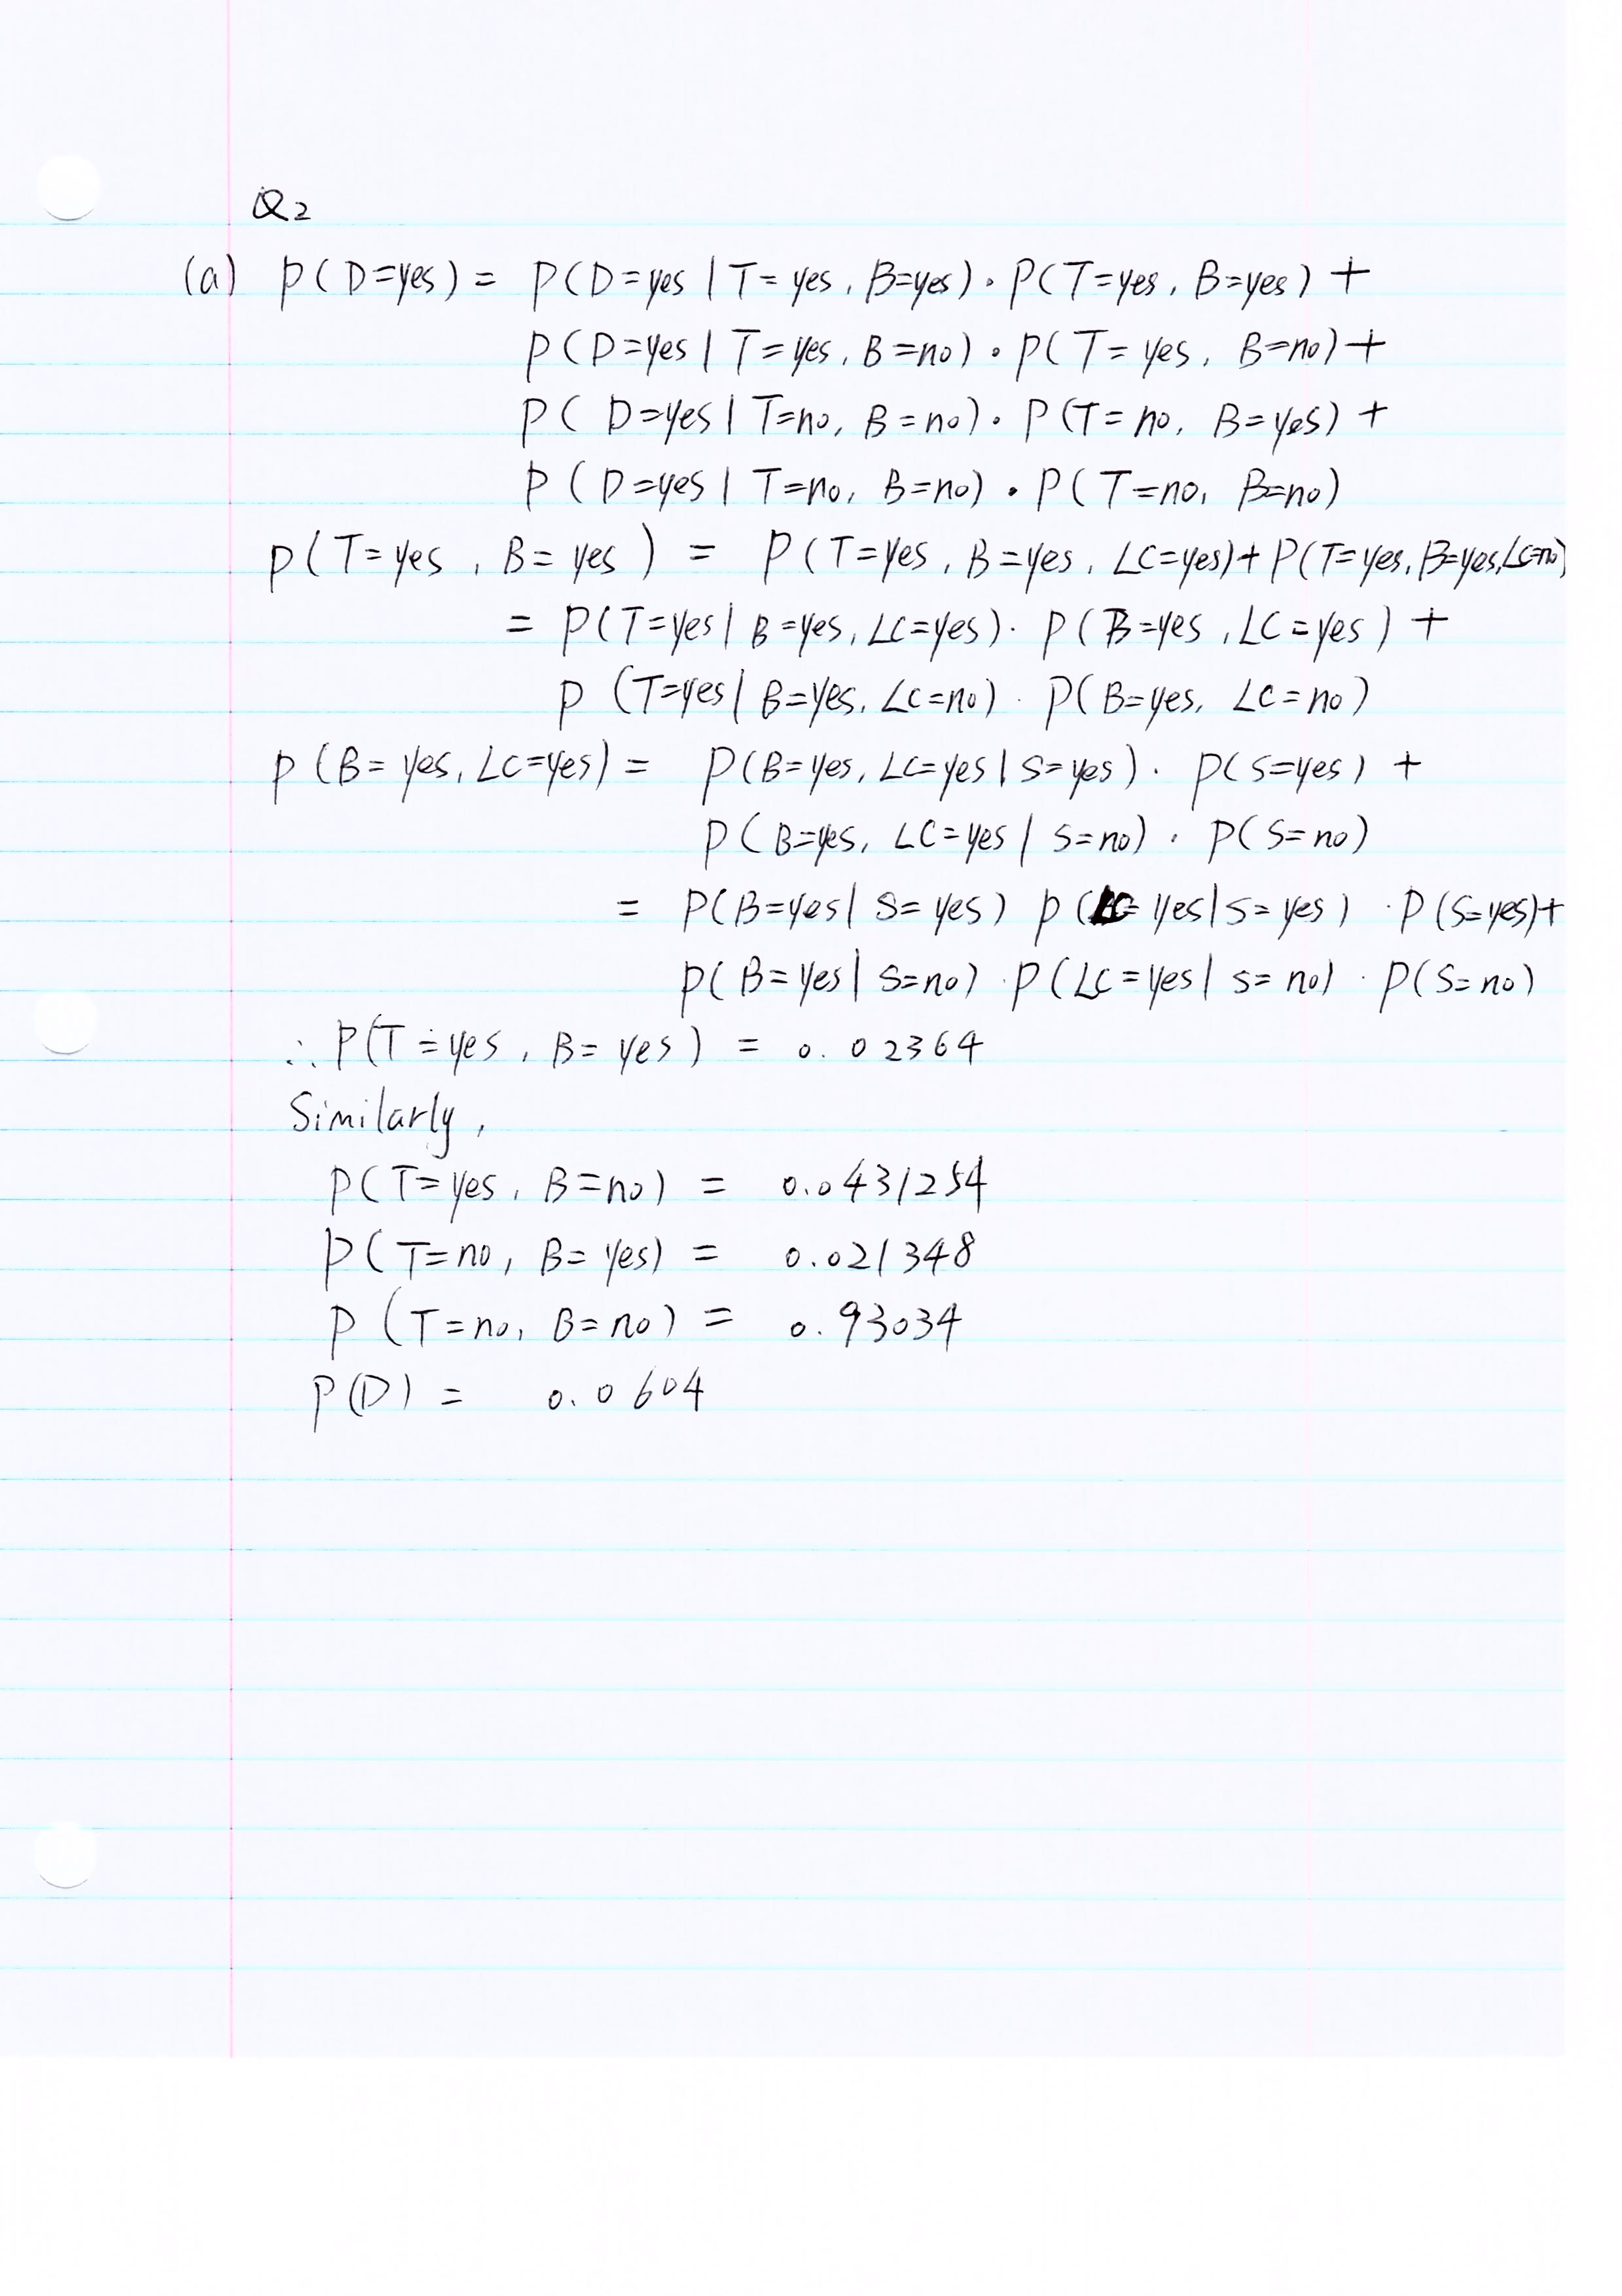

In [9]:
from IPython.display import Image
Image(filename='q2_2.jpg')
Image(filename='q2_1.jpg')

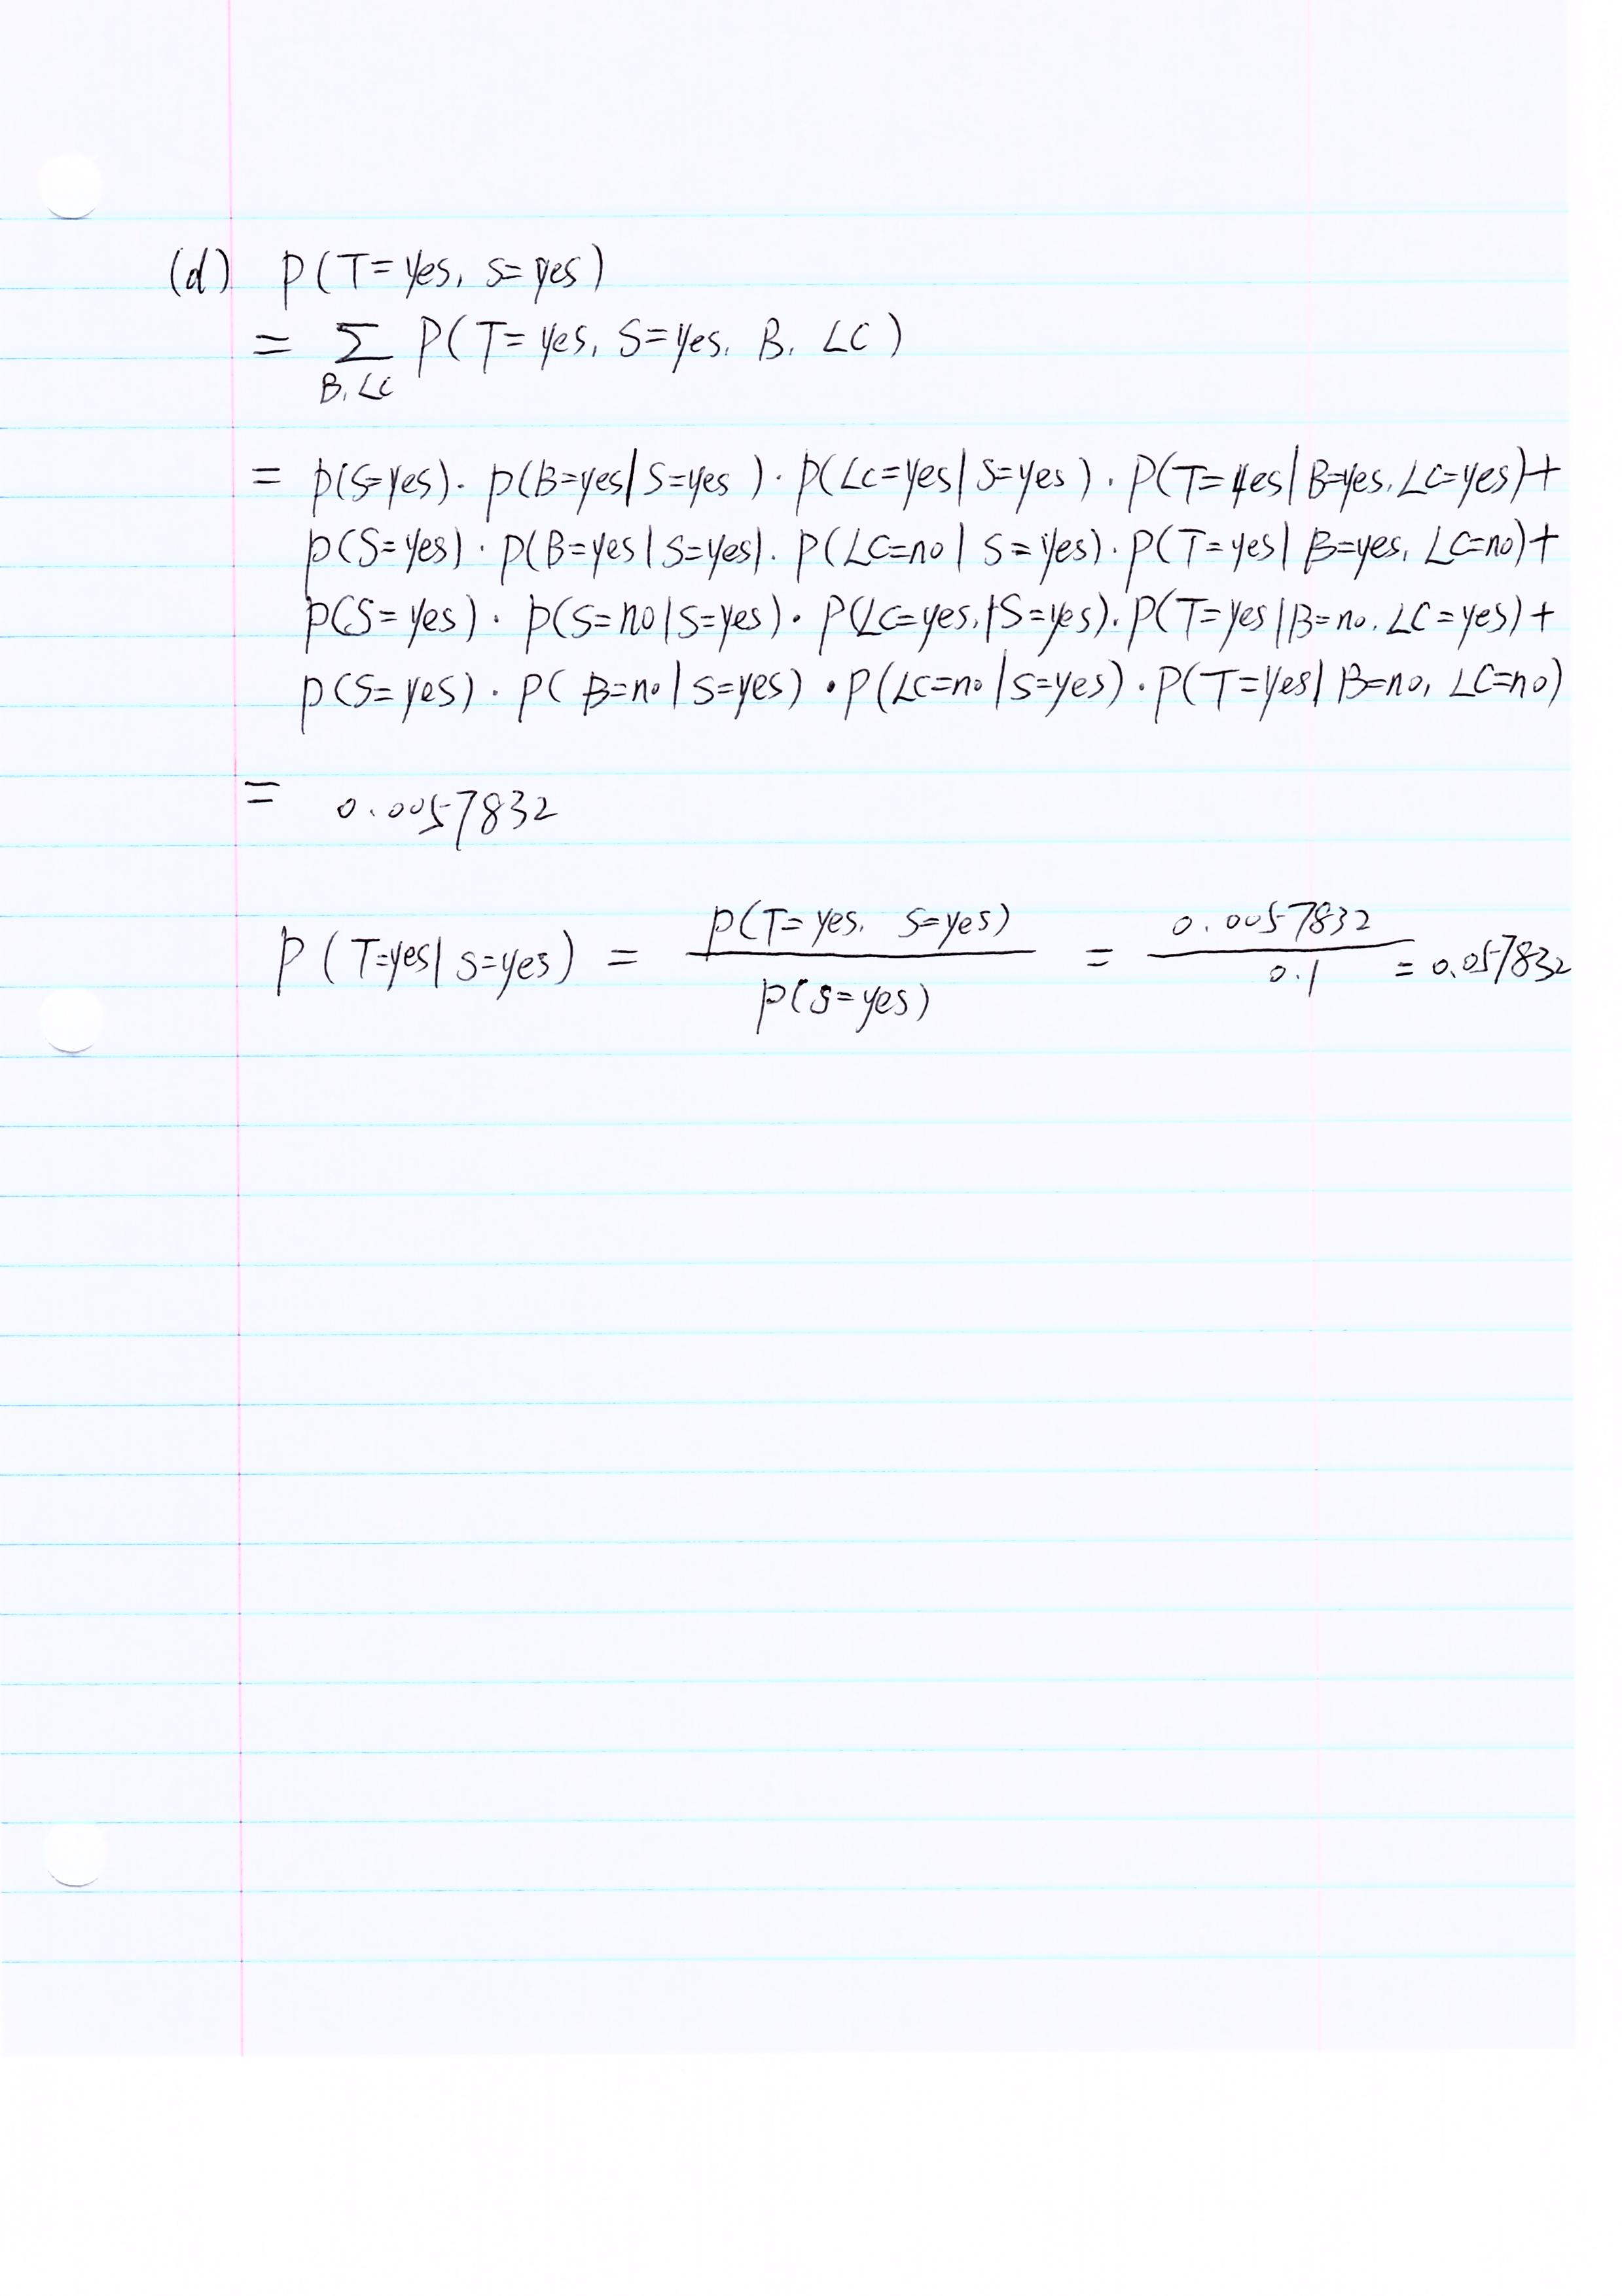

In [10]:
from IPython.display import Image
Image(filename='q2_3.jpg')

# Question 3 - Logistic Regression Classification (15pts)

In this question you will explore MINIST dataset. The goal is to use MNIST dataset and build a Logistic Regression classifier to classify between digits $\textbf{8 and 9}$.  Note that the imported MNIST dataset has 10 labels, from digits 0 to 9.  Use the code below to access the data set and extract the MNIST data.

In [14]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original", data_home='./dataset/')  # data downloaded in'./dataset/', change if necessary

X= (mnist.data / 255.)
y = mnist.target

X_train = X[:60000]
y_train = y[:60000]

X_test = X[60000:]
y_test = y[60000:]



1. Subsample the MNINST dataset and prepare the input feature and target variable for the binary classification between digits 8 and 9. (3pts)
    - Subsample the rows of the feature matrix (Xtrain, Xtest) corresponding to digits 8 and 9.
    - Subsample the rows of the target variable (ytrain, ytest) corresponding to digits 8 and 9. Label 0 for digits 8 and 1 for digits 9.
3. Train a logistic regression with almost no regularization (pass l2 (ridge) to penalty and 1,000,000 to the C parameter which is the inverse of regularization strength lambda. This essentially does l2 regularization but applies very little weight to the penalty term) and report the [confusion matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) on the test data. Also report the accuracy for the "y = 0" class, the "y = 1" class, and the average per-class accuracy on the test data. Average per-class accuracy is described in this [post](http://rasbt.github.io/mlxtend/user_guide/evaluate/scoring/). You can use your confusion matrix to calculate this.  (4pts)
4. Repeat step 3 except use l2 penalty with Cs of [0.01, 0.1, 1, 10 ,100]. You will want to use 3-fold cross validation to select the best parameter. To evaluate which parameter is best, maximize the average per-class accuracy. To help with this task, check out [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) and how to make your own [custom scorer](http://scikit-learn.org/stable/modules/model_evaluation.html).  (4pts)
5. Repeat question 4 except use l1 instead of l2 as the penalty type, use Cs of  [0.01, ..., 100].  Compare the performances of the models (no regularization, l2, l1) using the average per-class accuracy.  (4pts)

## Solutions

In [15]:
idx = (y_train == 8) + (y_train==9)
X_train = X_train[idx]
y_train = y_train[idx]
y_train = (y_train-8)

idx = (y_test == 8) + (y_test==9)
X_test = X_test[idx]
y_test = y_test[idx]
y_test = (y_test-8)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(11800, 784) (11800,) (1983, 784) (1983,)


In [16]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [17]:
logreg = LogisticRegression(penalty = 'l2', C=1000000)
logreg.fit(X_train, y_train)
scoreLR = accuracy_score(y_test, logreg.predict(X_test))
print("Accuracy: %f" % scoreLR)

Accuracy: 0.965204


In [18]:
cm = confusion_matrix(y_test, logreg.predict(X_test))
print(cm)

[[940  34]
 [ 35 974]]


In [21]:
# l2 penalty
parameters = {'C':[.01, 0.1, 1, 10, 100]}
logreg = LogisticRegression(penalty = 'l2')

def mean_class_accuracy(estimator, X, y):
    cm = confusion_matrix(y, estimator.predict(X))
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    return np.mean(cm_normalized.diagonal())

clf = GridSearchCV(logreg, parameters, cv=3, scoring=mean_class_accuracy)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print("MSE: {}".format(mean_squared_error(predictions, y_test)))
cm = confusion_matrix(y_test, predictions)
print(cm)
print("No affairs accuracy: {}".format(cm[0][0]/np.float(sum(cm[0]))))
print("Affairs accuracy: {}".format(cm[1][1]/np.float(sum(cm[1]))))
print("MCA: {}".format(mean_class_accuracy(clf, X_test, y_test)))

MSE: 0.019667170953101363
[[957  17]
 [ 22 987]]
No affairs accuracy: 0.9825462012320328
Affairs accuracy: 0.9781962338949455
MCA: 0.9803712175634891


In [20]:
# l1 penalty
parameters = {'C':[.01, 0.1, 1, 10, 100]}
logreg = LogisticRegression(penalty = 'l1')

def mean_class_accuracy(estimator, X, y):
    cm = confusion_matrix(y, estimator.predict(X))
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    return np.mean(cm_normalized.diagonal())

clf = GridSearchCV(logreg, parameters, cv=3, scoring=mean_class_accuracy)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print("MSE: {}".format(mean_squared_error(predictions, y_test)))
cm = confusion_matrix(y_test, predictions)
print(cm)
print("No affairs accuracy: {}".format(cm[0][0]/np.float(sum(cm[0]))))
print("Affairs accuracy: {}".format(cm[1][1]/np.float(sum(cm[1]))))
print("MCA: {}".format(mean_class_accuracy(clf, X_test, y_test)))

MSE: 0.019667170953101363
[[955  19]
 [ 20 989]]
No affairs accuracy: 0.9804928131416838
Affairs accuracy: 0.9801783944499505
MCA: 0.9803356037958171


# Question 4: Regression Trees (6+5+4 = 15 points)
In this question, we will be exploring the application of regression tree (RT) using sklearn package in Python. 

You will be using an NBA dataset (nbasalariesfull.csv) to predict a player’s Salary using all the numeric performance variables available ( so everything but Player, Team, and Position ). 

- a. Use a random state of 42 and a test size of 1/3 to split the data into training and test.
     
         Build a regression using DecisionTreeRegressor with max_depth = 6. 
         Report the mean squared errors on both training and test datasets.( 6 points )


- b. Repeat Part-1 with max_depth = 2. (5 points )


- c. Briefly explain what you observe from these MSE values obtained by using maximum tree depths 6 and 2? 
         Which tree is better and why? ( 4 points )

## Solutions

## A

In [1]:
import pandas as pd
from sklearn.cross_validation import train_test_split
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np
%matplotlib inline
data = pd.read_csv("nbasalariesfull.csv")
print(data.shape)
data.head()

/home/saharsh/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(379, 30)


Player   Tm Pos   Age     G    GS    MP    FG   FGA    FG%  \
0     Stephen Curry  GSW  PG  27.0  79.0  79.0  34.2  10.2  20.2  0.504   
1      James Harden  HOU  SG  26.0  82.0  82.0  38.1   8.7  19.7  0.439   
2      Kevin Durant  OKC  SF  27.0  72.0  72.0  35.8   9.7  19.2  0.505   
3  DeMarcus Cousins  SAC   C  25.0  65.0  65.0  34.6   9.2  20.5  0.451   
4      LeBron James  CLE  SF  31.0  76.0  76.0  35.6   9.7  18.6  0.520   

     ...     ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PSG    SALARY  
0    ...     0.9  4.6   5.4  6.7  2.1  0.2  3.3  2.0  30.1  11370786  
1    ...     0.8  5.3   6.1  7.5  1.7  0.6  4.6  2.8  29.0  15756438  
2    ...     0.6  7.6   8.2  5.0  1.0  1.2  3.5  1.9  28.2  20158622  
3    ...     2.4  9.1  11.5  3.3  1.6  1.4  3.8  3.6  26.9  15851950  
4    ...     1.5  6.0   7.4  6.8  1.4  0.6  3.3  1.9  25.3  22970500  

[5 rows x 30 columns]

In [2]:
#data.SALARY.values
#data.columns[3:29]
X = data[data.columns[3:29]].values
y = data.SALARY.values / 1000000
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [3]:
rt_d6 = DecisionTreeRegressor(max_depth=6)
rt_d6 = rt_d6.fit(X_train, y_train)

# MSE on training data with Max Depth 6
pred_train_d6 = rt_d6.predict(X_train)
mse_train_d6 = mean_squared_error(pred_train_d6, y_train)
print("MSE on train data with max_depth=6 is %s" % mse_train_d6)

#MSE ON test data
pred_test_d6 = rt_d6.predict(X_test)
mse_test_d6 = mean_squared_error(pred_test_d6, y_test)
print("MSE on test data with max_depth=6 is %s" % mse_test_d6)

MSE on train data with max_depth=6 is 2.55756099828
MSE on test data with max_depth=6 is 18.225415826


## B

In [4]:
rt_d2 = DecisionTreeRegressor(max_depth=2)
rt_d2 = rt_d2.fit(X_train, y_train)

pred_train_d2 = rt_d2.predict(X_train)
mse_train_d2 = mean_squared_error(pred_train_d2, y_train)
print("\nMSE on train data with max_depth=2 is %s" % mse_train_d2)

pred_test_d2 = rt_d2.predict(X_test)
mse_test_d2 = mean_squared_error(pred_test_d2, y_test)
print("MSE on test data with max_depth=2 is %s" % mse_test_d2)


MSE on train data with max_depth=2 is 12.2748323214
MSE on test data with max_depth=2 is 16.9570464837


## C

('X=4 is ', 'FG')
('X=18 is ', 'DRB')
('X=0 is ', 'Age')


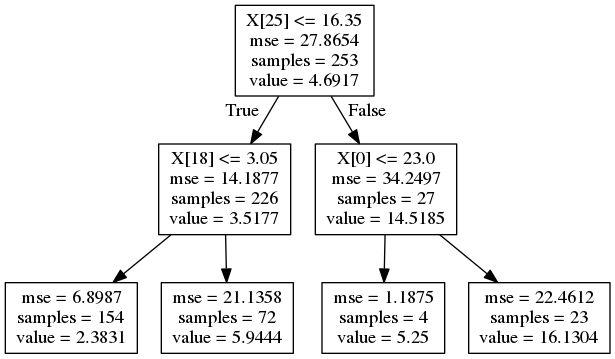

In [5]:
from sklearn.tree import export_graphviz
from IPython.display import Image
export_graphviz(rt_d2, out_file='rtree_d2.dot') 
!dot -Tpng rtree_d2.dot -o rtree_d2.png
showc = data.columns[3:29]
print("X=4 is ",showc[4])
print("X=18 is ",showc[18])
print("X=0 is ",showc[0])
Image(filename='rtree_d2.png') 

The tree with max_depth 6 obtained lower MSE on the training data,
but higher MSE on the test data compared to the tree with max_depth = 2. 

That means the former tree overfits the data and does not generalize well on the test dataset. 

Therefore the regression tree with depth 2 is better as it does not overfit the data and perform well on unseen data.

# Question 5.  AUC vs Lift Curve ( 5 points )
Describe the similarities and difference between AUC and Lift Curves.

## Solution

The ROC curve has the false positive rate of the model along the X axis , and the true positive rate along the Y axis. <br>
The higher the curve, the better the ratio of true positive vs false positive, hence a good model.
<strong>AUC</strong> is the area under the ROC curve.

A perfect model would return a squared ROC, that is, a model in which there is no misclassification:
we reach 100% true positive at the 0% false positive point. <br>
A perfectly bad model (two distributions overlapping) would return a 45 degree line, as there would be 50% true positive and 50% false positives.

When normalized, the AUC is the probability that a classifier will rank a randomly chosen positive instance higher than a randomly chosen negative one.


<strong>Lift curves</strong> show the probabilties of each observation ordered in descending fashion and separated into deciles(most probable observations in first decile, 2nd most in 2nd, etc ).  <br>
The lift is the ratio of the correct positive classifications made by the model to the actual positive classifications in the test data. <br>For example, if 40% of patients have been diagnosed (the positive classification) in the past, and <br>the model accurately predicts 75% of them, the lift would be .75 / .40 = 1.875

AUC is similar to lift charts in that they provide a means of comparison between individual models and <br>determine thresholds which yield a high proportion of positive hits. Lift charts however are sorted by decile and can be helpful for determining how much resources to devote to a task.  If we have a limited budget, we want to maximize the probability of the top 10% (or whatever) of observations are being correctly classified compared with a random model